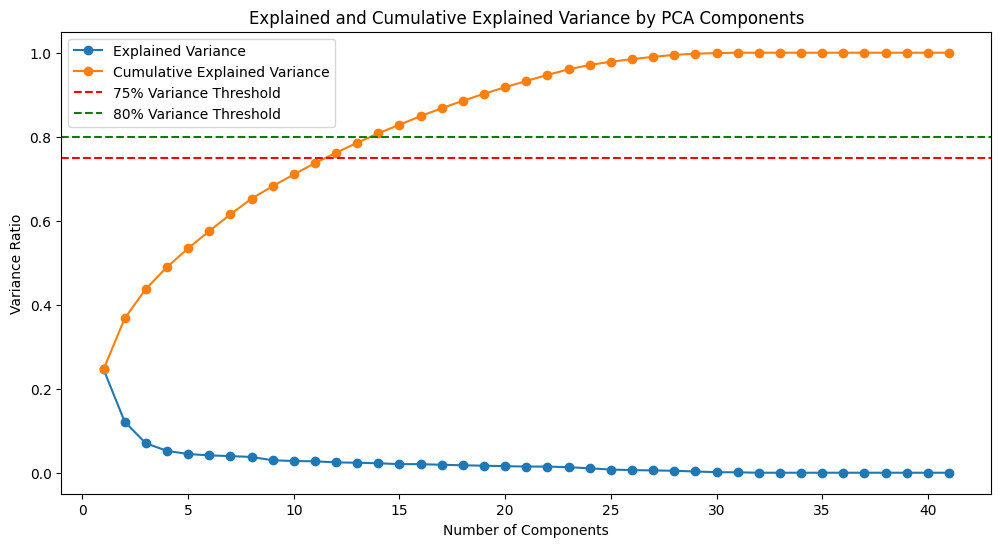

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('../../outputs/Assignment_3/extracted_features_data.csv')
test_data = pd.read_csv('../../outputs/Assignment_3/extracted_features_data.csv')

# Separate the features and target variable
x_train = data.drop(columns=['Target'])
y_train = data['Target']
x_test = test_data.drop(columns=['Target'])
y_test = test_data['Target']

# Standardize the features before applying PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Step 1: Apply PCA to analyze explained variance
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_scaled)

# Calculate cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot the explained variance and cumulative variance
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', label='Cumulative Explained Variance')
plt.axhline(y=0.75, color='r', linestyle='--', label="75% Variance Threshold")
plt.axhline(y=0.80, color='g', linestyle='--', label="80% Variance Threshold")
plt.xlabel('Number of Components')
plt.ylabel('Variance Ratio')
plt.title('Explained and Cumulative Explained Variance by PCA Components')
plt.legend()
plt.show()



Number of components to explain 75-80% variance: 14
Cumulative explained variance with 14 components: 0.81


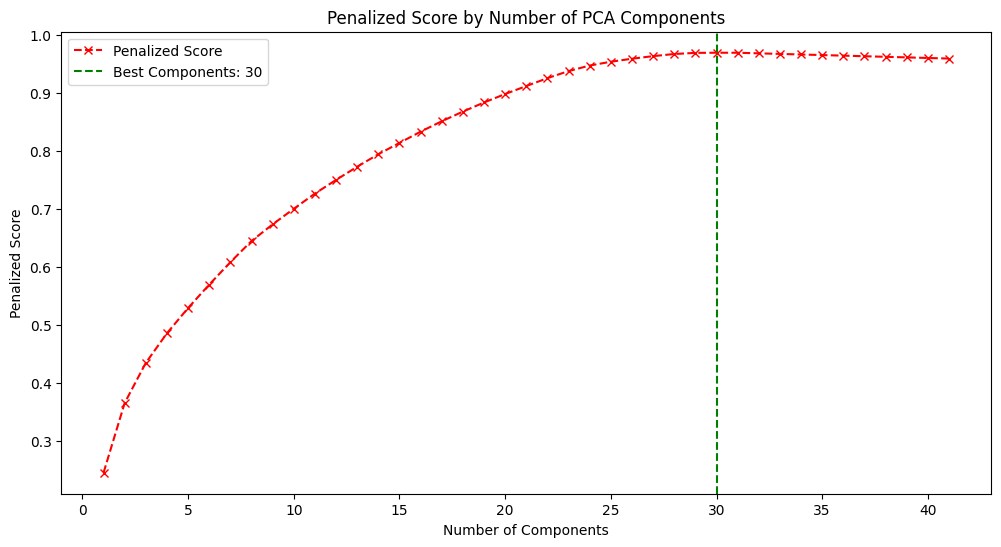

In [2]:
# Step 2: Select the number of components to retain 75-80% variance
min_variance_threshold = 0.75
max_variance_threshold = 0.80
best_n_components = np.argmax(cumulative_variance >= min_variance_threshold) + 1

# If cumulative variance with `best_n_components` is below 80%, use it; otherwise, find where it reaches 80%
if cumulative_variance[best_n_components - 1] < max_variance_threshold:
    best_n_components = np.argmax(cumulative_variance >= max_variance_threshold) + 1

print(f"Number of components to explain 75-80% variance: {best_n_components}")
print(f"Cumulative explained variance with {best_n_components} components: {cumulative_variance[best_n_components - 1]:.2f}")

plt.figure(figsize=(12, 6))

# Plot cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='b', label='Cumulative Explained Variance')

# Add lines for the 75% and 80% variance thresholds
plt.axhline(y=0.75, color='r', linestyle='--', label="75% Variance Threshold")
plt.axhline(y=0.80, color='g', linestyle='--', label="80% Variance Threshold")

# Mark the selected number of components
plt.axvline(x=best_n_components, color='purple', linestyle='--', label=f"Selected Components: {best_n_components}")
plt.scatter(best_n_components, cumulative_variance[best_n_components - 1], color='purple', s=100, zorder=5)  # Highlight the selected point

# Labels and title
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.legend()
plt.show()


In [3]:
# Step 3: Apply PCA with optimal number of components
pca_smart = PCA(n_components=best_n_components)
X_train_pca_smart = pca_smart.fit_transform(X_train_scaled)
X_test_pca_smart = pca_smart.transform(X_test_scaled)

In [4]:
# Step 3: Apply PCA with the chosen number of components
pca_smart = PCA(n_components=best_n_components)
X_train_pca_smart = pca_smart.fit_transform(X_train_scaled)
X_test_pca_smart = pca_smart.transform(X_test_scaled)

# Check cumulative variance with the selected components
cumulative_variance_smart = np.cumsum(pca_smart.explained_variance_ratio_)
print(f"Explained variance with {best_n_components} components: {cumulative_variance_smart[-1]:.2f}")

Explained variance with 14 components: 0.81


Selected Principal Components after SelectKBest: ['PC1', 'PC2', 'PC3', 'PC5', 'PC6', 'PC8', 'PC14']


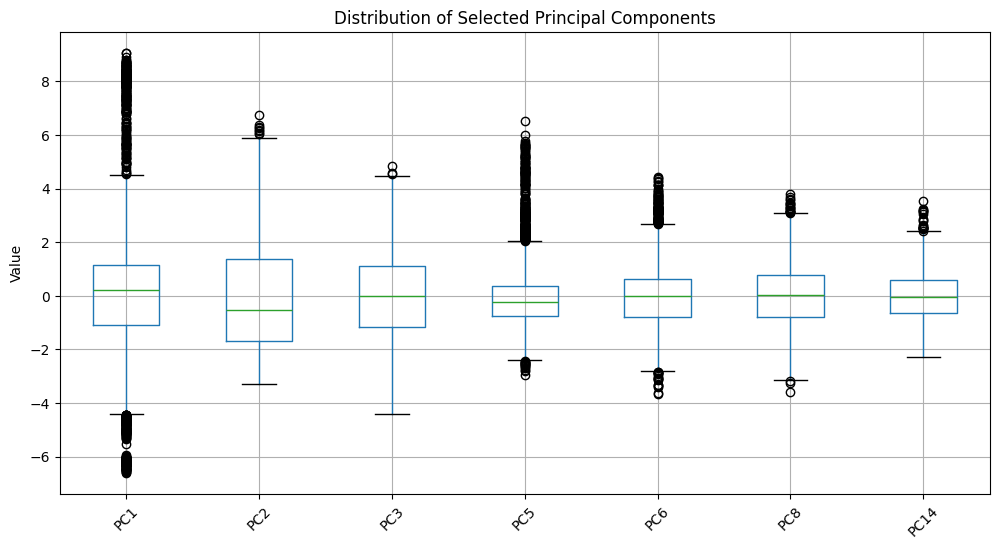

Final selected feature data saved to ../../outputs/Assignment_3/final_selected_features_data.csv.


In [61]:
# Step 4: Apply SelectKBest on PCA-transformed data
k = 7  # Number of features to select; adjust as needed
selector = SelectKBest(score_func=f_classif, k=k)
selector.fit(X_train_pca_smart, y_train)

# Transform both the training and test sets based on selected PCA components
X_train_selected = selector.transform(X_train_pca_smart)
X_test_selected = selector.transform(X_test_pca_smart)

# Display selected components
selected_components = [f'PC{i+1}' for i in range(best_n_components) if selector.get_support()[i]]
print("Selected Principal Components after SelectKBest:", selected_components)

# Step 5: Visualize the final selected components
x_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_components)

plt.figure(figsize=(12, 6))
x_train_selected_df.boxplot()
plt.title('Distribution of Selected Principal Components')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

x_train_selected_df['Target'] = y_train.reset_index(drop=True)

# Save the final combined features to CSV
final_output_path = '../../outputs/Assignment_3/final_selected_features_data.csv'
x_train_selected_df.to_csv(final_output_path, index=False)
print(f"Final selected feature data saved to {final_output_path}.")
